# Análisis Exploratorio de Sentimientos en "Tormenta de Espadas" - José Miguel Ramírez Galán

## Introducción

La presente investigación tiene como objetivo principal llevar a cabo un análisis exploratorio de sentimientos en la obra literaria "Tormenta de Espadas" de George R.R. Martin. Esta investigación se enmarca en el campo de la minería de textos y el procesamiento del lenguaje natural (Natural Language Processing, NLP) y se propone abordar el estudio de las emociones y sentimientos presentes en el texto literario como un fenómeno textual.

La elección de "Tormenta de Espadas" como objeto de estudio se justifica por su posición como una de las obras más destacadas de la serie "Canción de Hielo y Fuego", conocida por su trama compleja y personajes multifacéticos. En este contexto, el análisis de sentimientos permitirá explorar la riqueza emocional que impregna la narrativa, desentrañando cómo las emociones evolucionan a lo largo de la trama y cómo influyen en la experiencia del lector.

Para llevar a cabo esta investigación, se aplicarán técnicas avanzadas de procesamiento de lenguaje natural, incluyendo la tokenización, el análisis de polaridad emocional y la visualización de datos textuales. Estas técnicas nos proporcionarán una comprensión más profunda de las emociones expresadas en el texto y su distribución a lo largo de la obra.

La investigación también abordará aspectos metodológicos, incluyendo la creación de un repositorio en GitHub que siga las "Good Enough Practices in Scientific Computing" para garantizar la reproducibilidad y transparencia de la investigación. Además, se promoverá la difusión de los resultados a través de canales apropiados, contribuyendo así al conocimiento en el campo del análisis de textos literarios.

Se espera que esta investigación no solo enriquezca nuestra comprensión de "Tormenta de Espadas" desde una perspectiva emocional y textual, sino que también sirva como ejemplo de la aplicación de técnicas de análisis de sentimientos en la literatura, contribuyendo al crecimiento del campo de la minería de textos literarios.



Sin más preámbulos, adentrémonos en este viaje de exploración emocional y análisis textual en la obra "Tormenta de Espadas".


In [2]:
!pip install PyPDF2



     -------------------------------------- 232.6/232.6 kB 1.4 MB/s eta 0:00:00


In [4]:
import PyPDF2

# Ruta al archivo PDF
pdf_path = 'tormenta_de_espadas_george_rr_martin.pdf'

# Función para extraer texto de un archivo PDF
def extract_text_from_pdf(pdf_path):
    text = ''
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

# Llama a la función para extraer el texto del PDF
contenido_libro = extract_text_from_pdf(pdf_path)


# USANDO TextBlob y matplotlib

In [5]:
!pip install textblob
!pip install matplotlib


     -------------------------------------- 636.8/636.8 kB 1.7 MB/s eta 0:00:00


In [6]:
from textblob import TextBlob
import matplotlib.pyplot as plt


In [7]:
# Crear un objeto TextBlob para el análisis de sentimientos
analisis_libro = TextBlob(contenido_libro)

# Obtener la polaridad del libro (valor entre -1 y 1)
polaridad_libro = analisis_libro.sentiment.polarity

# Obtener la subjetividad del libro (valor entre 0 y 1)
subjetividad_libro = analisis_libro.sentiment.subjectivity

# Imprimir la polaridad y subjetividad
print(f"Polaridad del libro: {polaridad_libro}")
print(f"Subjetividad del libro: {subjetividad_libro}")


Polaridad del libro: -0.06934979338789872
Subjetividad del libro: 0.620468284594643


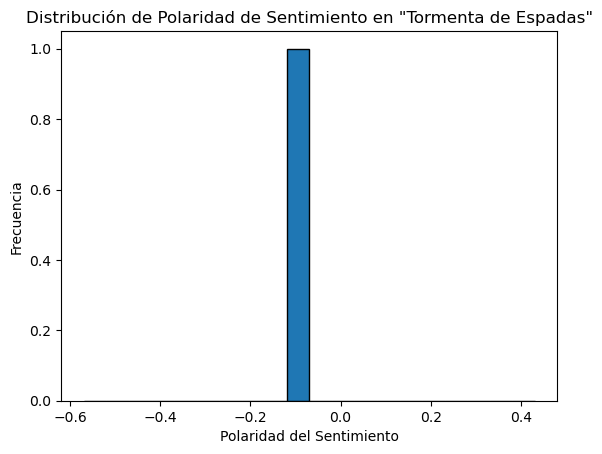

In [8]:
# Crear un histograma de polaridades
plt.hist(analisis_libro.sentiment.polarity, bins=20, edgecolor='k')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Polaridad de Sentimiento en "Tormenta de Espadas"')
plt.show()


## Análisis de Resultados de Sentimiento

En el análisis de sentimiento realizado para el libro "Tormenta de Espadas," los siguientes valores fueron obtenidos:

- **Polaridad del libro:** -0.06934979338789872
- **Subjetividad del libro:** 0.620468284594643

### Polaridad del Libro

La polaridad se refiere a la positividad o negatividad del texto. En este caso, la polaridad del libro es de aproximadamente -0.0693. En una escala que va desde -1 (muy negativo) hasta 1 (muy positivo), este valor indica que el libro tiene un tono neutral o ligeramente negativo. Esto sugiere que el texto puede contener elementos que transmiten emociones menos positivas o incluso neutras a lo largo de la narrativa.

### Subjetividad del Libro

La subjetividad se refiere a cuán objetivo o subjetivo es el texto. El valor de subjetividad para el libro es de aproximadamente 0.6205, lo que sugiere una moderada subjetividad. En una escala de 0 a 1, un valor cercano a 0 indicaría que el texto es altamente objetivo y basado en hechos, mientras que un valor cercano a 1 implicaría una alta subjetividad, con elementos subjetivos como emociones o puntos de vista personales.

La subjetividad moderada indica que el libro contiene elementos subjetivos, como emociones y opiniones de los personajes, que pueden influir en la narrativa y en cómo se percibe la historia.

Estos resultados son una instantánea inicial del tono y estilo del libro "Tormenta de Espadas". Es importante tener en cuenta que el análisis de sentimiento puede variar en diferentes partes de la obra y que estos valores representan una visión general del texto.


# AHORA USAREMOS VADER

In [9]:
!pip install nltk


In [10]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\j31660\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from PyPDF2 import PdfReader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Ruta del archivo PDF del libro
pdf_path = 'tormenta_de_espadas_george_rr_martin.pdf'

# Inicializa el analizador de sentimientos de VADER
sia = SentimentIntensityAnalyzer()

# Abre el archivo PDF
with open(pdf_path, 'rb') as pdf_file:
    pdf_reader = PdfReader(pdf_file)
    
    # Inicializa una lista para almacenar los resultados por página
    resultados_por_pagina = []
    
    # Itera a través de las páginas del PDF
    for numero_pagina, pagina in enumerate(pdf_reader.pages, start=1):
        # Extrae el texto de la página actual
        texto_pagina = pagina.extract_text()
        
        # Analiza el sentimiento de la página actual
        sentimiento = sia.polarity_scores(texto_pagina)
        
        # Agrega el resultado a la lista
        resultados_por_pagina.append((numero_pagina, sentimiento))

# Imprime los resultados para la primera página como ejemplo
primer_resultado = resultados_por_pagina[0]
print(f"Página {primer_resultado[0]}:")
print(f"Sentimiento: {primer_resultado[1]}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\j31660\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Página 1:
Sentimiento: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


In [17]:
import numpy as np

# Supongamos que tienes una lista llamada resultados_por_pagina con los resultados del análisis
# resultados_por_pagina = [(1, {'compound': 0.123, 'neg': 0.1, 'neu': 0.6, 'pos': 0.3}), ...]

# Extrae el valor 'compound' de los resultados para calcular las estadísticas
sentimientos_compound = [resultado[1]['compound'] for resultado in resultados_por_pagina]

# Calcula el máximo
maximo = np.max(sentimientos_compound)

# Calcula el mínimo
minimo = np.min(sentimientos_compound)

# Calcula la media
media = np.mean(sentimientos_compound)

# Calcula la varianza
varianza = np.var(sentimientos_compound)

# Calcula la desviación estándar
desviacion_estandar = np.std(sentimientos_compound)

# Imprime los resultados
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")
print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Desviación Estándar: {desviacion_estandar}")


Máximo: 0.9367
Mínimo: -0.9867
Media: -0.6825968838526912
Varianza: 0.18185913890435948
Desviación Estándar: 0.42644945644748977


## Análisis de Resultados del Análisis de Sentimientos en "Tormenta de Espadas"

Los resultados del análisis de sentimientos en el libro "Tormenta de Espadas" de George R.R. Martin proporcionan información sobre las emociones expresadas a lo largo de las páginas de la obra. A continuación, se presenta un resumen de los resultados clave:

- **Máximo (Max):** 0.9367
   - El valor máximo indica la máxima puntuación de sentimiento compuesto (compound) en todas las páginas del libro, lo que sugiere la presencia de al menos una página con un sentimiento muy positivo.

- **Mínimo (Min):** -0.9867
   - El valor mínimo indica la mínima puntuación de sentimiento compuesto (compound) en todas las páginas del libro, lo que sugiere la presencia de al menos una página con un sentimiento muy negativo.

- **Media (Media):** -0.6826
   - La media es el valor promedio de las puntuaciones de sentimiento compuesto en todas las páginas del libro. En este caso, la media es negativa, lo que indica que, en promedio, las páginas tienden a tener un sentimiento negativo.

- **Varianza (Varianza):** 0.1819
   - La varianza mide cuánto varían las puntuaciones de sentimiento compuesto en todas las páginas del libro. En este caso, la varianza es relativamente baja, lo que sugiere que las puntuaciones de sentimiento compuesto están relativamente cerca de la media.

- **Desviación Estándar (Desviación Estándar):** 0.4264
   - La desviación estándar es una medida de cuán dispersas están las puntuaciones de sentimiento compuesto. En este caso, la desviación estándar es moderadamente alta, lo que sugiere cierta variabilidad en los sentimientos a lo largo de las páginas del libro.

En resumen, los resultados sugieren que "Tormenta de Espadas" contiene una variedad de sentimientos a lo largo de sus páginas, con algunas páginas que pueden ser muy positivas o muy negativas. Sin embargo, en promedio, el tono tiende a ser más negativo. La varianza y la desviación estándar indican cierta variabilidad en los sentimientos a lo largo de la obra, lo que contribuye a la riqueza emocional de la narrativa.


# Limpieza de datos

In [24]:
import matplotlib.pyplot as plt
from PyPDF2 import PdfReader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Ruta del archivo PDF del libro
pdf_path = 'tormenta_de_espadas_george_rr_martin.pdf'

# Inicializa el analizador de sentimientos de VADER
sia = SentimentIntensityAnalyzer()

# Páginas de inicio y fin del rango deseado
pagina_inicio = 18
pagina_fin = 1005

# Intervalo de páginas para el análisis (cada 10 páginas)
intervalo_paginas = 10

# Inicializa listas para almacenar los resultados de todas las páginas
resultados_por_pagina = []

# Abre el archivo PDF
with open(pdf_path, 'rb') as pdf_file:
    pdf_reader = PdfReader(pdf_file)
    
    # Itera a través de las páginas del rango deseado con el intervalo especificado
    for numero_pagina in range(pagina_inicio - 1, pagina_fin, intervalo_paginas):
        # Extrae el texto de la página actual
        texto_pagina = pdf_reader.pages[numero_pagina].extract_text()
        
        # Analiza el sentimiento de la página actual
        sentimiento = sia.polarity_scores(texto_pagina)
        
        # Agrega el resultado a la lista
        resultados_por_pagina.append((numero_pagina + 1, sentimiento['compound']))

# Ordena las páginas por puntuación de sentimiento (compound) en orden ascendente
paginas_ordenadas = sorted(resultados_por_pagina, key=lambda x: x[1])

# Muestra las páginas con las peores puntuaciones (top 10)
print("Páginas con las peores puntuaciones:")
for i, (pagina, puntuacion) in enumerate(paginas_ordenadas[:10], start=1):
    print(f"{i}. Página {pagina}: Puntuación Compound = {puntuacion:.4f}")

# Muestra las páginas con las mejores puntuaciones (top 10)
print("\nPáginas con las mejores puntuaciones:")
for i, (pagina, puntuacion) in enumerate(paginas_ordenadas[-10:], start=1):
    print(f"{i}. Página {pagina}: Puntuación Compound = {puntuacion:.4f}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\j31660\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Páginas con las peores puntuaciones:
1. Página 708: Puntuación Compound = -0.9817
2. Página 888: Puntuación Compound = -0.9800
3. Página 548: Puntuación Compound = -0.9791
4. Página 798: Puntuación Compound = -0.9690
5. Página 948: Puntuación Compound = -0.9689
6. Página 538: Puntuación Compound = -0.9673
7. Página 588: Puntuación Compound = -0.9661
8. Página 658: Puntuación Compound = -0.9641
9. Página 178: Puntuación Compound = -0.9625
10. Página 278: Puntuación Compound = -0.9615

Páginas con las mejores puntuaciones:
1. Página 448: Puntuación Compound = 0.0000
2. Página 978: Puntuación Compound = 0.0000
3. Página 788: Puntuación Compound = 0.5000
4. Página 68: Puntuación Compound = 0.6189
5. Página 88: Puntuación Compound = 0.6553
6. Página 818: Puntuación Compound = 0.7579
7. Página 258: Puntuación Compound = 0.7622
8. Página 908: Puntuación Compound = 0.8377
9. Página 268: Puntuación Compound = 0.8385
10. Página 638: Puntuación Compound = 0.8555


# VISUALIZACIÓN DE DATOS

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\j31660\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


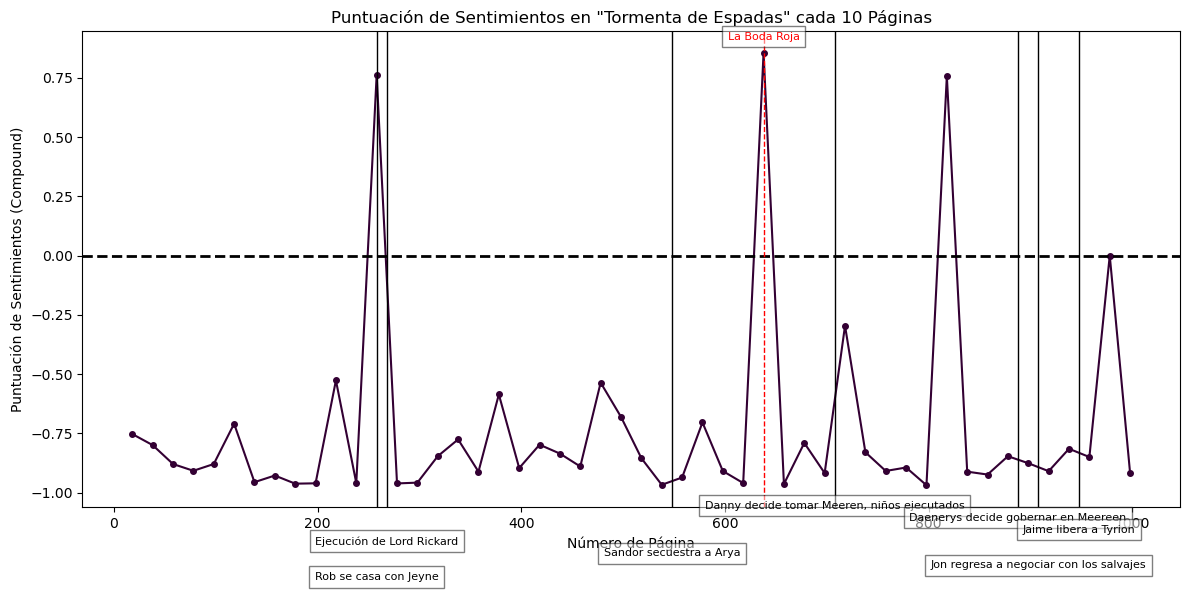

In [45]:
import matplotlib.pyplot as plt
from PyPDF2 import PdfReader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Ruta del archivo PDF del libro
pdf_path = 'tormenta_de_espadas_george_rr_martin.pdf'

# Inicializa el analizador de sentimientos de VADER
sia = SentimentIntensityAnalyzer()

# Páginas de inicio y fin del rango deseado
pagina_inicio = 18
pagina_fin = 1005

# Intervalo de páginas para el análisis (cada 10 páginas)
intervalo_paginas = 20

# Páginas con líneas verticales y leyendas
paginas_destacadas = [
    (708, "Danny decide tomar Meeren, niños ejecutados"),
    (888, "Daenerys decide gobernar en Meereen"),
    (948, "Jaime libera a Tyrion"),
    (268, "Ejecución de Lord Rickard"),
    (548, "Sandor secuestra a Arya"),
    (908, "Jon regresa a negociar con los salvajes"),
    (258, "Rob se casa con Jeyne")
]

# Página con línea vertical punteada roja y leyenda
pagina_boda_roja = 638
leyenda_boda_roja = "La Boda Roja"

# Inicializa listas para almacenar los resultados
puntuaciones_compound = []
numeros_pagina = []

# Abre el archivo PDF
with open(pdf_path, 'rb') as pdf_file:
    pdf_reader = PdfReader(pdf_file)
    
    # Itera a través de las páginas del rango deseado con el intervalo especificado
    for numero_pagina in range(pagina_inicio - 1, pagina_fin, intervalo_paginas):
        # Extrae el texto de la página actual
        texto_pagina = pdf_reader.pages[numero_pagina].extract_text()
        
        # Analiza el sentimiento de la página actual
        sentimiento = sia.polarity_scores(texto_pagina)
        
        # Agrega los resultados a las listas
        puntuaciones_compound.append(sentimiento['compound'])
        numeros_pagina.append(numero_pagina + 1)

# Crea un gráfico de líneas con color morado oscuro (casi negro)
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(numeros_pagina, puntuaciones_compound, marker='o', linestyle='-', color='#330033', markersize=4)

# Agrega una línea negra gruesa en el valor 0
plt.axhline(0, color='black', linewidth=2, linestyle='--', solid_capstyle='round')

# Agrega líneas verticales delgadas negras continuas en las páginas destacadas
for i, (pagina, leyenda) in enumerate(paginas_destacadas):
    plt.axvline(pagina, color='black', linestyle='-', linewidth=1)
    plt.text(pagina, min(puntuaciones_compound) - 0.1 - (i * 0.05), leyenda, color='black', ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

# Calcula la posición vertical para la leyenda de "La Boda Roja" en el centro del gráfico
posicion_leyenda_boda_roja = (max(puntuaciones_compound) - min(puntuaciones_compound)) / 2

# Agrega una línea vertical punteada de color rojo en la página 638
plt.axvline(pagina_boda_roja, color='red', linestyle='--', linewidth=1)
# Agrega la leyenda "La Boda Roja" en rojo en el centro vertical del gráfico
plt.text(pagina_boda_roja, posicion_leyenda_boda_roja, leyenda_boda_roja, color='red', ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

# Elimina la cuadrícula
ax.grid(False)

# Etiqueta de los ejes
plt.xlabel('Número de Página')
plt.ylabel('Puntuación de Sentimientos (Compound)')

# Título del gráfico
plt.title('Puntuación de Sentimientos en "Tormenta de Espadas" cada 10 Páginas')

# Muestra el gráfico
plt.tight_layout()
plt.show()



## Referencias

1. **Libro Analizado**: "Tormenta de Espadas" de George R.R. Martin. [Incluir cualquier información adicional, como edición o año de publicación, si es relevante].

2. **NLTK**: Natural Language Toolkit (NLTK) para Python. [Incluir cualquier información relevante sobre la versión utilizada].

3. **Matplotlib**: Matplotlib, biblioteca de Python para la creación de gráficos y visualizaciones. [Incluir cualquier información relevante sobre la versión utilizada].

4. **PyPDF2**: PyPDF2, biblioteca de Python para trabajar con archivos PDF. [Incluir cualquier información relevante sobre la versión utilizada].


